In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch

In [ ]:
def images(archivo_csv, carpeta):
    df = pd.read_csv(archivo_csv)

    bandgap = df['band_gap_mean']
    diccionario = {}

    for i, row in df.iterrows():
        lista_str_x = row['x1'][1:-1].split(", ")
        lista_str_y = row['x2'][1:-1].split(", ")
    
        x = [float(numero) for numero in lista_str_x]
        y = [float(numero) for numero in lista_str_y]
        Bandgap = float(bandgap[i])
    
        clave = f'dato_{i}'  
        diccionario[clave] = {'X': x, 'Y': y, 'Bandgap': Bandgap}
        
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)

    for clave, valores in diccionario.items():
        ruta_imagen = os.path.join(carpeta, f"{clave}.png")  
        
        plt.figure(figsize= (3, 3))
        plt.plot(valores['X'], valores['Y'], '-', color='k', linewidth=1.5)
        
        #plt.xlim(min(valores['X']), max(valores['X']))
        #plt.ylim(min(valores['Y'])-2, max(valores['Y'])+2)
        
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.savefig(ruta_imagen, bbox_inches='tight', pad_inches=0)  
        plt.close() 
        
    return diccionario

archivo_csv = "Dataset/Bandgap/dataset_Paper1_Fluorite.csv"
archivo_csv1 = "Dataset/Bandgap/dataset_Paper2_Mukesh.csv"
carpeta = "Dataset/img/Flourite"
carpeta1 = "Dataset/img/Muskesh"


fluorite = images(archivo_csv, carpeta)
muskesh = images(archivo_csv1, carpeta1)

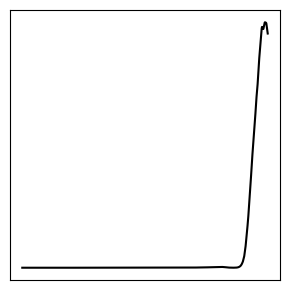

In [93]:

fluorite['dato_0']

x1 = fluorite['dato_0']['X']
y1 = fluorite['dato_0']['Y']

x_prueba = np.linspace(min(x), max(x), 900)
temp = np.interp(x_prueba, x1, y1)

plt.figure(figsize=(3, 3))

plt.plot(x_prueba, temp, label='Interpolación', linestyle='-',color='k', linewidth=1.5)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()


In [94]:
from scipy.signal import savgol_filter
from pykalman import KalmanFilter


window_length = 5
polyorder = 1
temp_smoothed = savgol_filter(temp, window_length=window_length, polyorder=polyorder)

# Graficando los datos originales y suavizados
plt.figure(figsize=(8, 5))
plt.plot(x1, y1, label='Datos Originales', linestyle='-', color='blue', linewidth=1.5)
plt.plot(x_prueba, temp_smoothed, label='Datos Suavizados', linestyle='-', color='red', linewidth=1.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Interpolación con Filtro de Savitzky-Golay')
plt.legend()
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'pykalman'

In [95]:
from scipy.signal import savgol_filter
from pykalman import KalmanFilter


temp2 = savgol_filter(data[0,:,1], window_length=5, polyorder=1)
temp2.shape

ModuleNotFoundError: No module named 'pykalman'

In [85]:


for clave, valores in fluorite.items():
    x = valores['X']
    y = valores['Y']

    x_prueba = np.linspace(min(x), max(x), 900)
    temp = np.interp(x_prueba, x, y)

    plt.figure(figsize=(3, 3))
    plt.plot(x_prueba, temp, label='Interpolación', linestyle='-',color='k', linewidth=1.5)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

    plt.show()


TypeError: list indices must be integers or slices, not str

In [ ]:
x = np.linspace(data_orig[0][0].min(),data_orig[0][0].max(),900)
temp = np.zeros((data_orig.shape[0],900))
for i in range(data_orig.shape[0]):
    temp[i,:] = np.interp(x,data_orig[i][0][:-1],data_orig[i][1][:-1])

In [53]:
df_fluorite = pd.DataFrame.from_dict(fluorite, orient='index')

df_muskesh = pd.DataFrame.from_dict(muskesh, orient='index')

dato_0_row = df_fluorite.loc["dato_0"]
print(dato_0_row)



X          [1.12726309532197, 1.1282891794029504, 1.12931...
Y          [0.0060821480926347695, 0.0037368379172620283,...
Bandgap                                                5.718
Name: dato_0, dtype: object


In [ ]:
def derivada_discreta(y):
    dy = np.gradient(y)
    
    return dy

carpeta_prueba = 'Dataset/img/Derivada_Flourite'

if not os.path.exists(carpeta_prueba):
    os.makedirs(carpeta_prueba)

for index, row in df_fluorite.iterrows():
    y_0 = row['Y']
    x_0 = row['X']
    
    derivete_y = derivada_discreta(y_0)
    
    ruta_imagen_prueba = os.path.join(carpeta_prueba, f"prueba_{index}.png") 

    plt.figure(figsize=(3, 3))
    plt.plot(x_0, derivete_y, '-', color='k', linewidth=1.5)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

    plt.savefig(ruta_imagen_prueba, bbox_inches='tight', pad_inches=0)  

    plt.close()

print("Imágenes guardadas exitosamente en la carpeta 'prueba'.")


In [ ]:

carpeta_prueba = 'Dataset/img/Derivada_Muskesh'
if not os.path.exists(carpeta_prueba):
    os.makedirs(carpeta_prueba)

for index, row in df_muskesh.iterrows():
    y_0 = row['Y']
    x_0 = row['X']
    derivete_y = derivada_discreta(y_0)
    ruta_imagen_prueba = os.path.join(carpeta_prueba, f"prueba_{index}.png") 
    plt.figure(figsize=(3, 3))
    plt.plot(x_0, derivete_y, '-', color='k', linewidth=1.5)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.tight_layout()
    plt.savefig(ruta_imagen_prueba, bbox_inches='tight', pad_inches=0)  
    plt.close()

print("Imágenes guardadas exitosamente en la carpeta 'pruebaMuskesh'.")

In [49]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from torch.utils.data import DataLoader, random_split

class CustomImageDataset(Dataset):
    def __init__(self, root_dir, root_dir_derivative, dataframe, transform=None):
        self.root_dir = root_dir
        self.root_dir_derivative = root_dir_derivative
        self.dataframe = dataframe
        self.transform = transform
        self.images = os.listdir(root_dir)
        self.images_derivative = os.listdir(root_dir_derivative)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        img_name_derivative = os.path.join(self.root_dir_derivative, self.images_derivative[idx])

        image = Image.open(img_name).convert("L")
        image_derivative = Image.open(img_name_derivative).convert("L")

        if self.transform:
            image = self.transform(image)
            image_derivative = self.transform(image_derivative)

        image = torch.cat((image, image_derivative), dim=0)

        img_filename = self.images[idx].split('.')[0]

        label = self.dataframe.loc[self.dataframe.index == img_filename, 'Bandgap'].values[0]
        
        label = torch.tensor(label, dtype=torch.float)  

        return image, label, self.images[idx] 

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  
])

dataset_fluorite = CustomImageDataset(
    root_dir=r'C:\Users\rueda\U\RedesNeuronales\proyecto final\imagenesFlourite2',
    root_dir_derivative=r'C:\Users\rueda\U\RedesNeuronales\proyecto final\pruebaFlourite',
    dataframe= df_fluorite,
    transform= transform
)

train_size_fluorite = int(0.8 * len(dataset_fluorite))
test_size_fluorite = len(dataset_fluorite) - train_size_fluorite

train_dataset_fluorite, test_dataset_fluorite = random_split(dataset_fluorite, [train_size_fluorite, test_size_fluorite])

train_loader_fluorite = DataLoader(train_dataset_fluorite, batch_size=4, shuffle=True)
test_loader_fluorite = DataLoader(test_dataset_fluorite, batch_size=4, shuffle=False)


In [50]:
test_dataset_fluorite.dataset.__dict__

{'root_dir': 'C:\\Users\\rueda\\U\\RedesNeuronales\\proyecto final\\imagenesFlourite2',
 'root_dir_derivative': 'C:\\Users\\rueda\\U\\RedesNeuronales\\proyecto final\\pruebaFlourite',
 'dataframe':                                                           X  \
 dato_0    [1.12726309532197, 1.1282891794029504, 1.12931...   
 dato_1    [1.12726309532197, 1.1282891794029504, 1.12931...   
 dato_2    [1.12726309532197, 1.1282891794029504, 1.12931...   
 dato_3    [1.12726309532197, 1.1282891794029504, 1.12931...   
 dato_4    [1.12726309532197, 1.1282891794029504, 1.12931...   
 ...                                                     ...   
 dato_525  [1.1272693495638397, 1.1282958218178423, 1.129...   
 dato_526  [1.1272693495638397, 1.1282958218178423, 1.129...   
 dato_527  [1.1272693495638397, 1.1282958218178423, 1.129...   
 dato_528  [1.1272693495638397, 1.1282958218178423, 1.129...   
 dato_529  [1.1272693495638397, 1.1282958218178423, 1.129...   
 
                                 

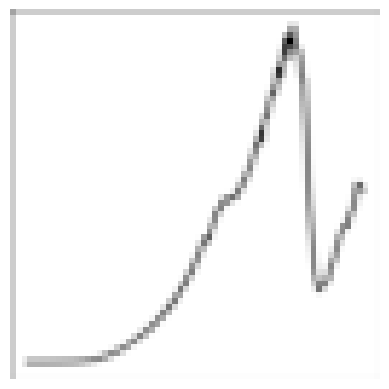

In [52]:
index = 0
image, label, _ = test_dataset_fluorite[index]

image = image[0].numpy()  
mean = 0.5
std = 0.5
image = (image * std) + mean
image = image.clip(0, 1)  

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


In [31]:
import torch.nn as nn
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(2, 32, kernel_size=3, stride=1, padding=1) 
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)  

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 64 * 16 * 16)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

model_fluorite = CNN()

criterion = nn.MSELoss() 
optimizer_fluorite = optim.Adam(model_fluorite.parameters(), lr=0.001)

num_epochs = 35
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels, filenames) in enumerate(train_loader_fluorite, 0):
        optimizer_fluorite.zero_grad()
        outputs = model_fluorite(inputs)
        loss = criterion(outputs, labels.view(-1, 1).float())
        loss.backward()
        optimizer_fluorite.step()

        running_loss += loss.item()
        if i % 100 == 99: 
            print(f'Fluorite - Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader_fluorite)}], Loss: {running_loss / 100}')
            running_loss = 0.0


print('Finished Training for Fluorite')


Fluorite - Epoch [5/35], Step [100/106], Loss: 0.04472776852431707
Fluorite - Epoch [6/35], Step [100/106], Loss: 0.026483031805837526
Fluorite - Epoch [7/35], Step [100/106], Loss: 0.023219100611750036
Fluorite - Epoch [8/35], Step [100/106], Loss: 0.03616878077795263
Fluorite - Epoch [9/35], Step [100/106], Loss: 0.017408842127188108
Fluorite - Epoch [10/35], Step [100/106], Loss: 0.03400923704728484
Fluorite - Epoch [11/35], Step [100/106], Loss: 0.018576574936159888
Fluorite - Epoch [12/35], Step [100/106], Loss: 0.018667960542370566
Fluorite - Epoch [13/35], Step [100/106], Loss: 0.011877609592629597
Fluorite - Epoch [14/35], Step [100/106], Loss: 0.018272263847175053
Fluorite - Epoch [15/35], Step [100/106], Loss: 0.01135024843912106
Fluorite - Epoch [16/35], Step [100/106], Loss: 0.01823155932710506
Fluorite - Epoch [17/35], Step [100/106], Loss: 0.0372018200653838
Fluorite - Epoch [18/35], Step [100/106], Loss: 0.010117526018293575
Fluorite - Epoch [19/35], Step [100/106], Loss

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_errors(self, val_input, val_target, batch_size):
    true_labels = []
    predicted_labels = []

    for minibatch in range(0, val_input.shape[0], batch_size):
        input_batch = val_input[minibatch:minibatch+batch_size]
        target_batch = val_target[minibatch:minibatch+batch_size]

        with torch.no_grad():
            outputs = self.forward(input_batch)
            _, predicted = torch.max(outputs, 1)

        true_labels.extend(target_batch.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

    # """
    # Calcular las métricas de evaluación
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(
        true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print("Accuracy:", accuracy)
    print("Precission:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)



In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Cargar la imagen
image_path_fluorite = "imagenesFlourite2/dato_9.png"

data = image_path_fluorite.split("/")[-1].split(".")[0]

image_path_derivative = "pruebaFlourite/prueba_dato_9.png"  
image_fluorite = Image.open(image_path_fluorite).convert("L") 
image_derivative = Image.open(image_path_derivative).convert("L")  

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

image_fluorite = transform(image_fluorite) 
image_derivative = transform(image_derivative) 

image = torch.cat((image_fluorite, image_derivative), dim=0)

#image, label = test_dataset_fluorite.__getitem__(105)

image = image.unsqueeze(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image = image.to(device)

model_fluorite = model_fluorite.to(device)

model_fluorite.eval()  
with torch.no_grad():
    outputs = model_fluorite(image)

predicted_bandgap = outputs.mean().item()

print(f"Predicción de Bandgap para el {data}:", predicted_bandgap)


In [37]:
import torch
import torchvision.transforms as transforms
from PIL import Image


image, label, di = test_dataset_fluorite.__getitem__(1)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image = image.to(device)

model_fluorite = model_fluorite.to(device)

model_fluorite.eval()  
with torch.no_grad():
    outputs = model_fluorite(image)

predicted_bandgap = outputs.mean().item()

print(f"Predicción de Bandgap para el {di}:", predicted_bandgap)


Predicción de Bandgap para el dato_40.png: 2.0569844245910645


In [38]:
fluorite['dato_40']['Bandgap']

1.864

In [42]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Crear un DataLoader para el conjunto de datos de prueba
test_loader = DataLoader(test_dataset_fluorite, batch_size=1, shuffle=False)

# Mover el modelo al dispositivo (GPU si está disponible, de lo contrario, CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_fluorite.to(device)


all_predictions = []

model_fluorite.eval()  
with torch.no_grad():
    for images, _ ,_ in test_loader_fluorite:
        images = images.to(device)  
        outputs = model_fluorite(images)
        
        predicted_bandgap = outputs.mean().item()
        
        all_predictions.append(predicted_bandgap)

for i, prediction in enumerate(all_predictions, 1):
    print(f"Predicción {i}: {prediction}")


Predicción 1: 2.0513625144958496
Predicción 2: 2.0576772689819336
Predicción 3: 2.085264205932617
Predicción 4: 3.2567434310913086
Predicción 5: 2.096877098083496
Predicción 6: 2.837214231491089
Predicción 7: 2.3791277408599854
Predicción 8: 2.0431103706359863
Predicción 9: 2.031028985977173
Predicción 10: 4.180217742919922
Predicción 11: 3.138784408569336
Predicción 12: 2.110441207885742
Predicción 13: 2.1192498207092285
Predicción 14: 2.863903284072876
Predicción 15: 2.8588995933532715
Predicción 16: 3.3156113624572754
Predicción 17: 2.4049201011657715
Predicción 18: 2.3672256469726562
Predicción 19: 2.407595634460449
Predicción 20: 2.3948376178741455
Predicción 21: 2.8538999557495117
Predicción 22: 2.3746042251586914
Predicción 23: 2.2040839195251465
Predicción 24: 3.1992034912109375
Predicción 25: 2.153707504272461
Predicción 26: 3.254706859588623
Predicción 27: 3.801745653152466


In [45]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_fluorite = CNN()

model_fluorite.to(device)

criterion = nn.MSELoss()

total_loss = 0.0
num_samples = 0
model_fluorite.eval()  
with torch.no_grad():
    for images, labels, _ in test_loader_fluorite:  
        images = images.to(device)  
        labels = labels.to(device)  

        outputs = model_fluorite(images)
        loss = criterion(outputs, labels)
        total_loss += loss.item() * images.size(0)
        num_samples += images.size(0)

mse = total_loss / num_samples
print('Mean Squared Error (MSE) of the model on the test images:', mse)

c:\Users\rueda\anaconda3\envs\cuda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Mean Squared Error (MSE) of the model on the test images: 7.483395594470906


c:\Users\rueda\anaconda3\envs\cuda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [48]:
import torch
from sklearn.metrics import r2_score

model_fluorite.eval()  # Cambiar el modelo a modo de evaluación
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels, _ in test_loader_fluorite:  
        images = images.to(device)  
        labels = labels.to(device)  

        outputs = model_fluorite(images)
        predictions.extend(outputs.cpu().numpy()) 
        true_labels.extend(labels.cpu().numpy())   

r2 = r2_score(true_labels, predictions)

print('Coefficient of determination R^2:', r2)


Coefficient of determination R^2: -5.6795173201990625


In [ ]:
import torch.nn as nn
import torch.optim as optim

class ShallowCNN(nn.Module):
    def __init__(self):
        super(ShallowCNN, self).__init__()
        self.conv1 = nn.Conv2d(2, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 32 * 32, 128)
        self.relu2 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = x.view(-1, 16 * 32 * 32)
        x = self.fc1(x)
        x = self.relu2(x)
        x = self.fc2(x)
        return x
